In [1]:
# Import para visualizar as pastas
import os
import sys

# Adiciona a pasta raiz do projeto ao path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from pathlib import Path

In [25]:
# import das bibliotecas utilizadas para exploração do dataframe
from src.data import load_raw_csv, load_custom_csv
from src.features import prepare_feature
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from joblib import load

In [3]:
df = load_raw_csv()

In [4]:
print(df.shape)

(121273, 2)


In [5]:
print(df.describe())

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000


In [6]:
print(df.isna().sum())

Datetime    0
AEP_MW      0
dtype: int64


In [7]:
print(df.dtypes)

Datetime     object
AEP_MW      float64
dtype: object


## Ttransofrmando Coluna Datetime para Datetime

In [8]:
df_datetime = df.copy()
df_datetime['Datetime'] = pd.to_datetime(df_datetime['Datetime'])

In [9]:
display(df_datetime)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [10]:
print(df_datetime.dtypes)

Datetime    datetime64[ns]
AEP_MW             float64
dtype: object


In [11]:
df_aep_mw = df['AEP_MW']

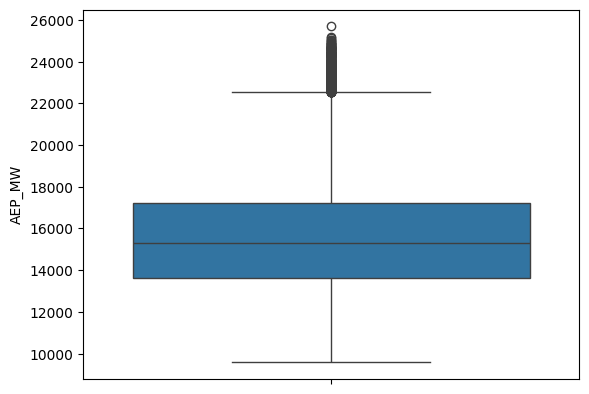

In [12]:
ax = sns.boxplot(data=df_aep_mw)
plt.tight_layout
plt.show()

In [13]:
df_date = df_datetime.sort_values("Datetime")

In [14]:
display(df_date)

,Datetime,AEP_MW
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0
...,...,...
116157,2018-08-02 20:00:00,17673.0
116158,2018-08-02 21:00:00,17303.0
116159,2018-08-02 22:00:00,17001.0
116160,2018-08-02 23:00:00,15964.0


# Salvando Novo DF

Salvando novo dataframe no caminha `data/processed`

In [15]:
# Salvar o DataFrame completo ajustado
data_path = Path("../data/processed")  # ".." sobe um nível para o root do projeto
# Garantir que a pasta processed exista
os.makedirs(data_path, exist_ok=True)
df_date.to_csv(data_path/"AEP_hourly_update.csv", index=False)

## Gerando arquivos csv e png 2004 a 2018

- Arquivos .csv gerados em `data/processed`
- Arquivos .png gerados em `reports/figures`

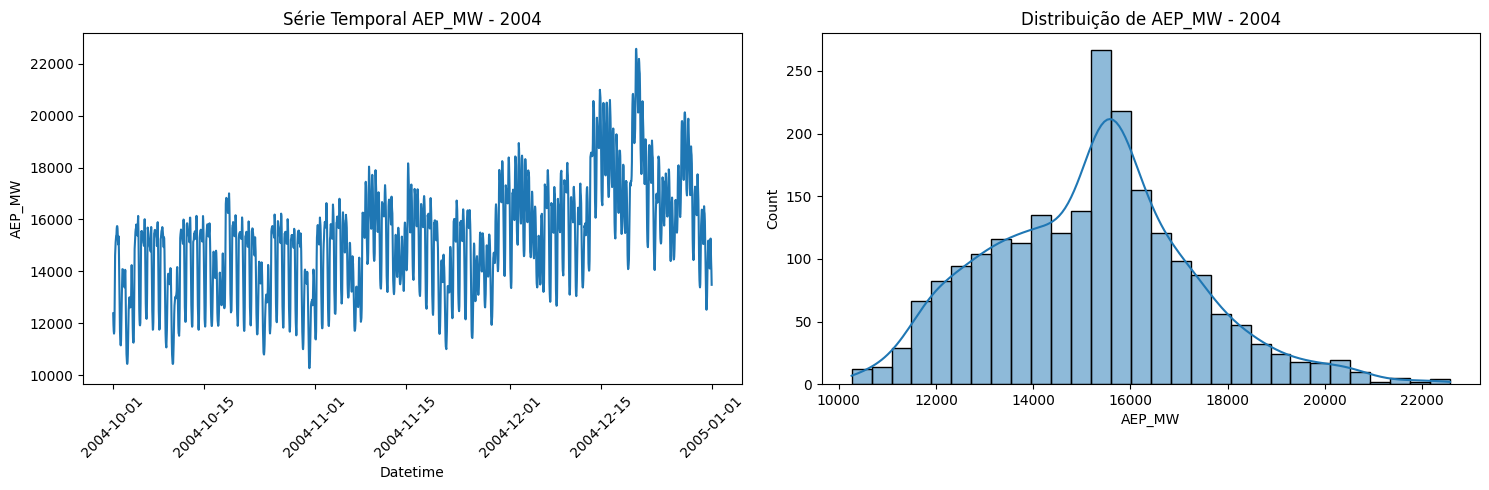

Arquivo EDA gerado e salvo para 2004 em:
 -> ../reports/figures/eda_2004.png
 -> ../data/processed/AEP_2004.csv


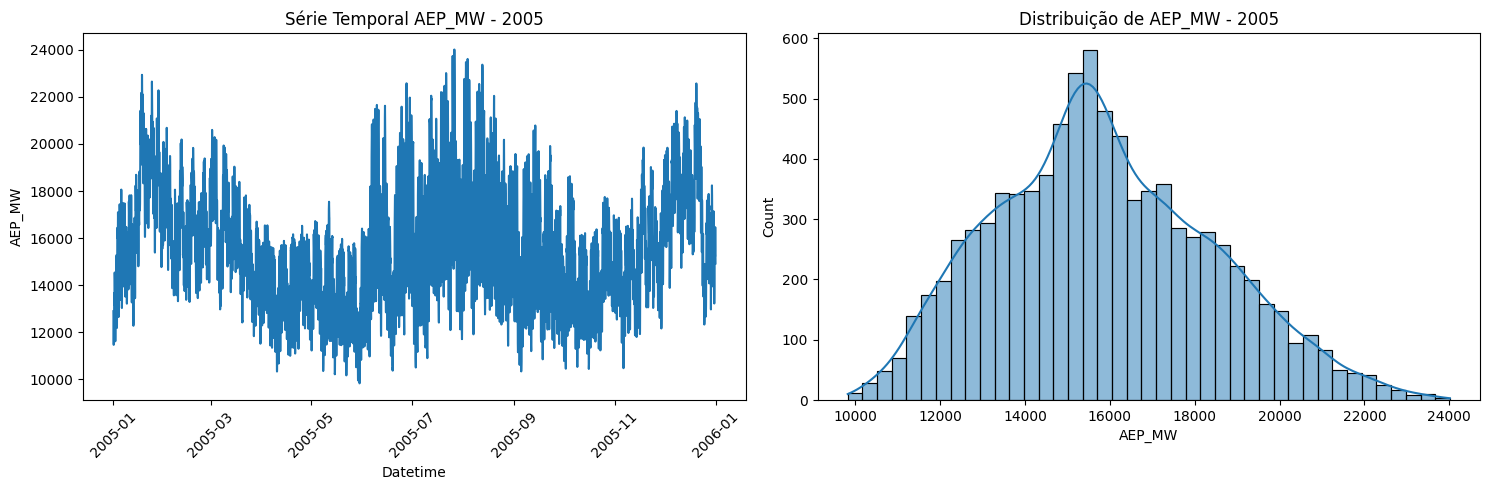

Arquivo EDA gerado e salvo para 2005 em:
 -> ../reports/figures/eda_2005.png
 -> ../data/processed/AEP_2005.csv


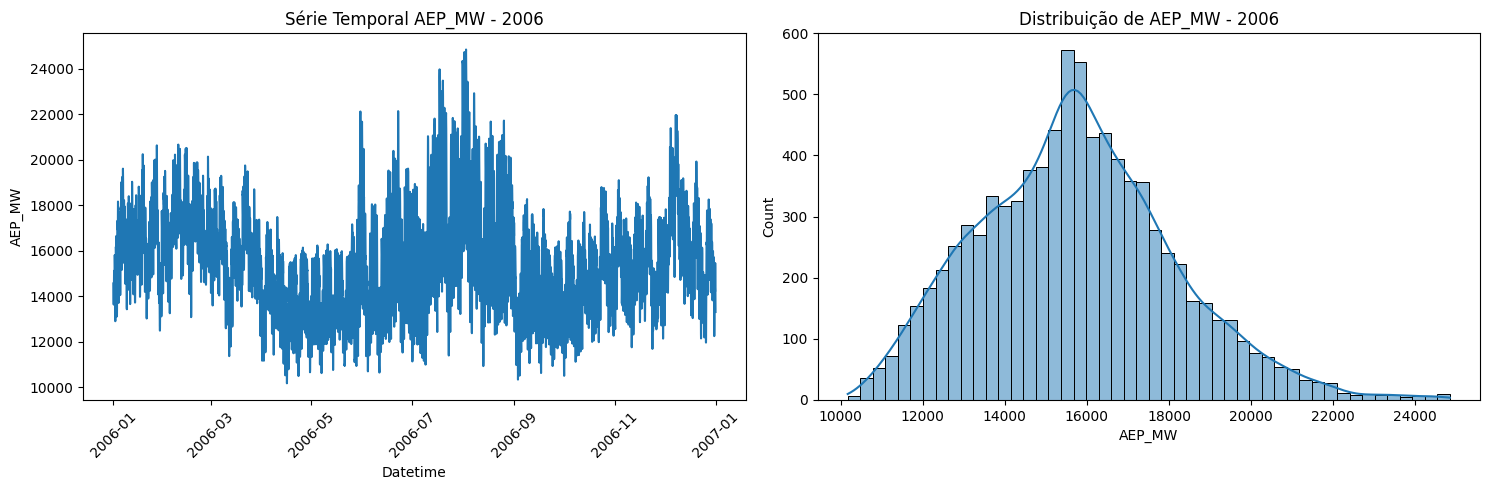

Arquivo EDA gerado e salvo para 2006 em:
 -> ../reports/figures/eda_2006.png
 -> ../data/processed/AEP_2006.csv


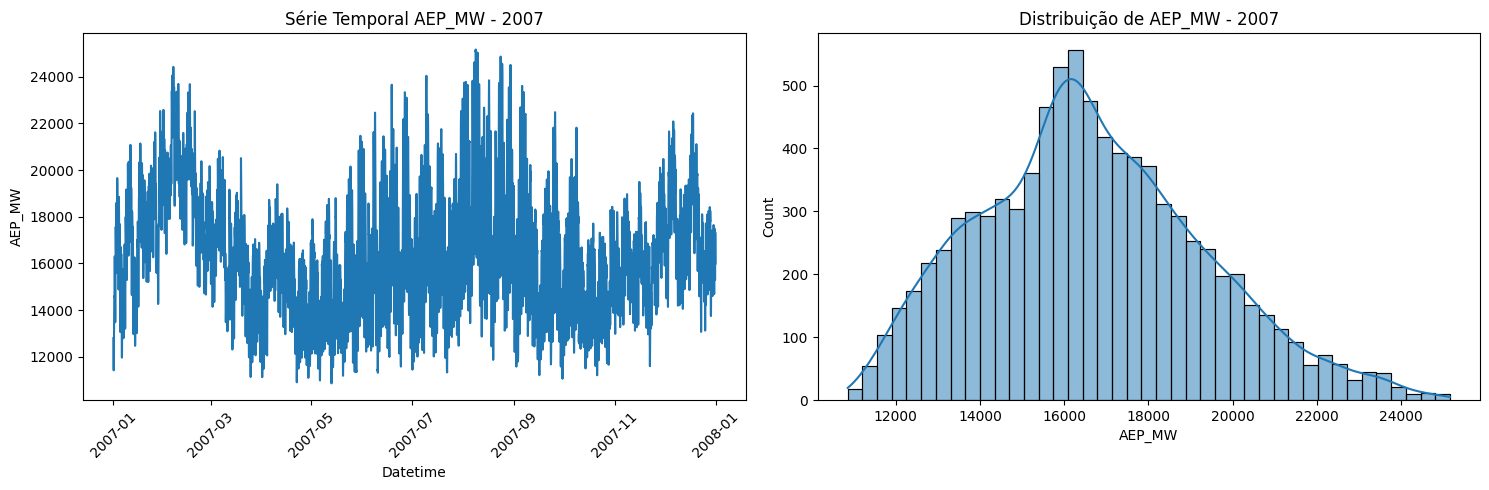

Arquivo EDA gerado e salvo para 2007 em:
 -> ../reports/figures/eda_2007.png
 -> ../data/processed/AEP_2007.csv


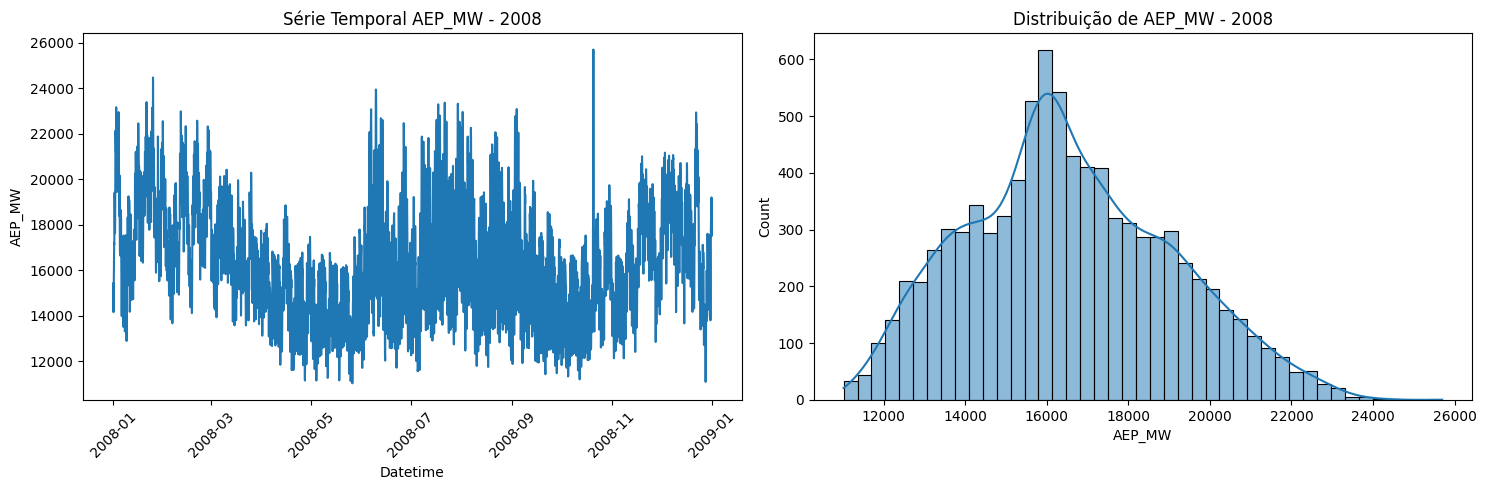

Arquivo EDA gerado e salvo para 2008 em:
 -> ../reports/figures/eda_2008.png
 -> ../data/processed/AEP_2008.csv


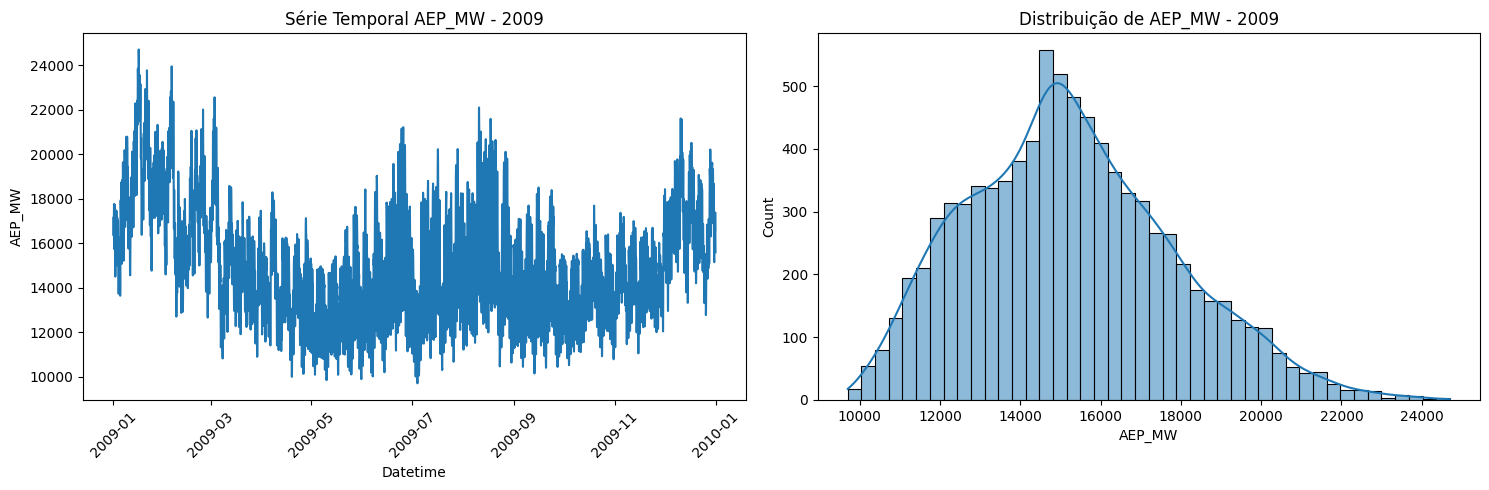

Arquivo EDA gerado e salvo para 2009 em:
 -> ../reports/figures/eda_2009.png
 -> ../data/processed/AEP_2009.csv


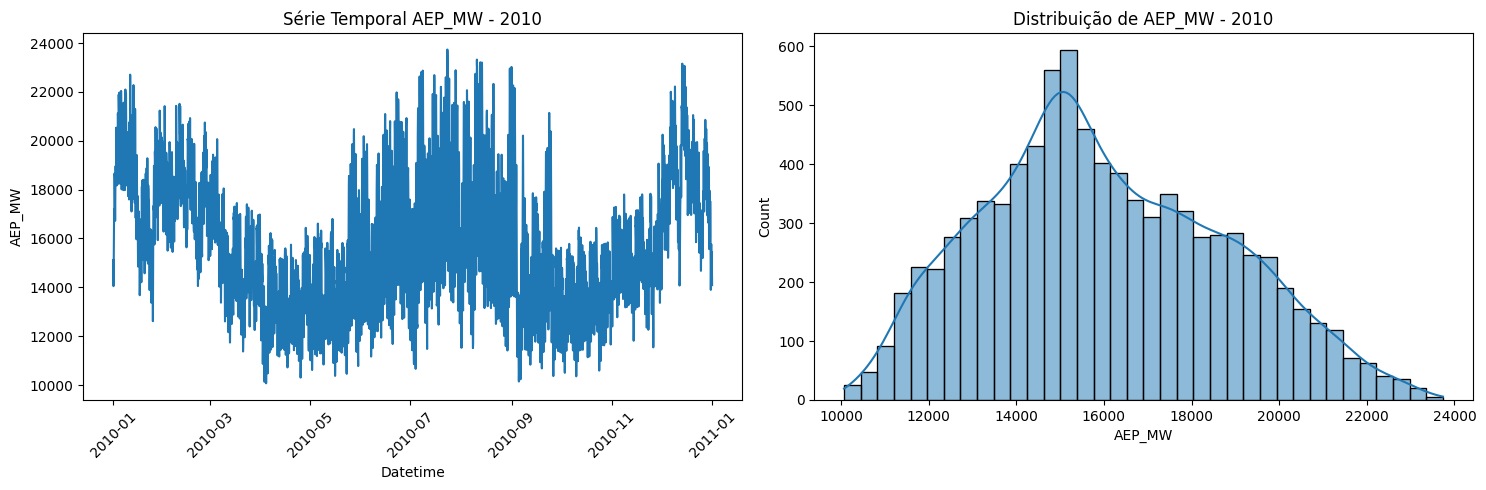

Arquivo EDA gerado e salvo para 2010 em:
 -> ../reports/figures/eda_2010.png
 -> ../data/processed/AEP_2010.csv


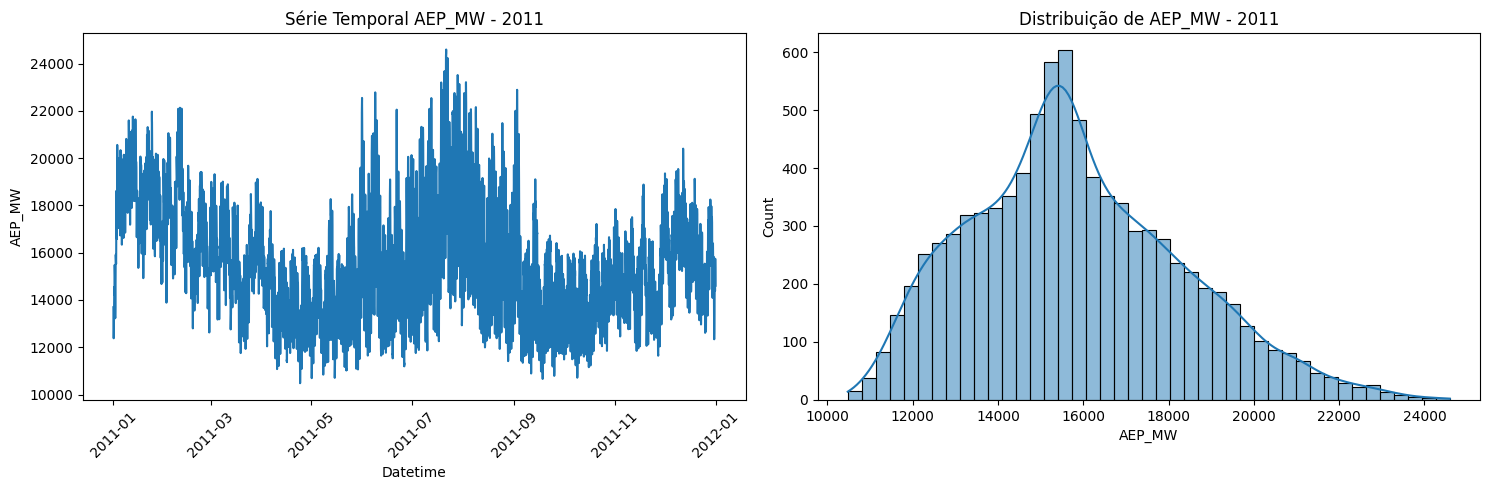

Arquivo EDA gerado e salvo para 2011 em:
 -> ../reports/figures/eda_2011.png
 -> ../data/processed/AEP_2011.csv


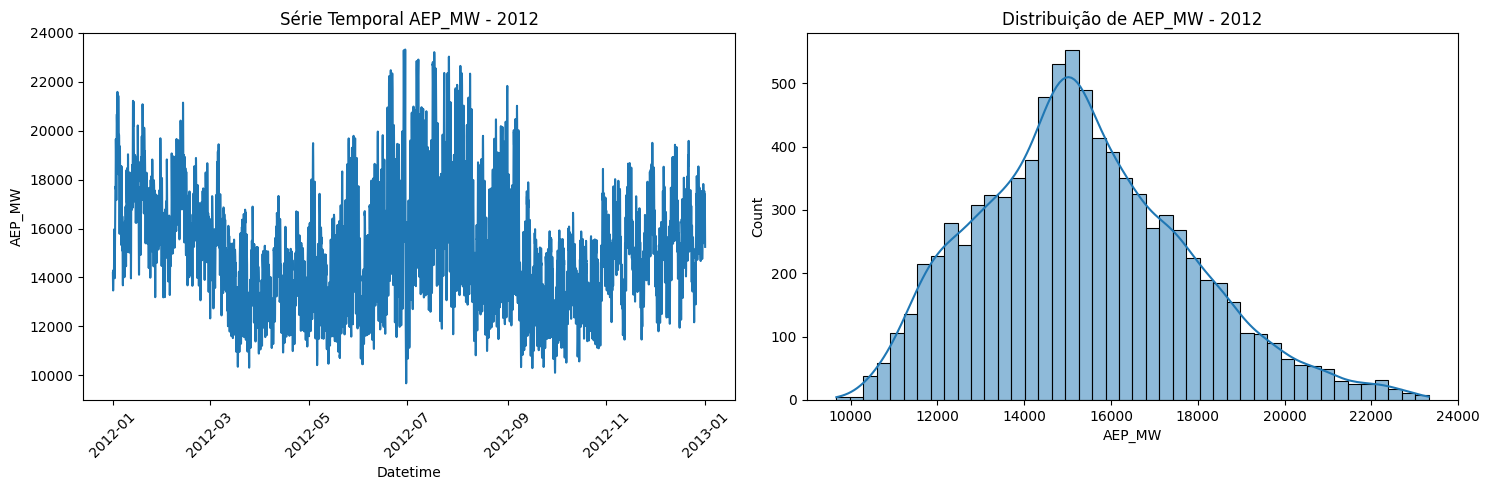

Arquivo EDA gerado e salvo para 2012 em:
 -> ../reports/figures/eda_2012.png
 -> ../data/processed/AEP_2012.csv


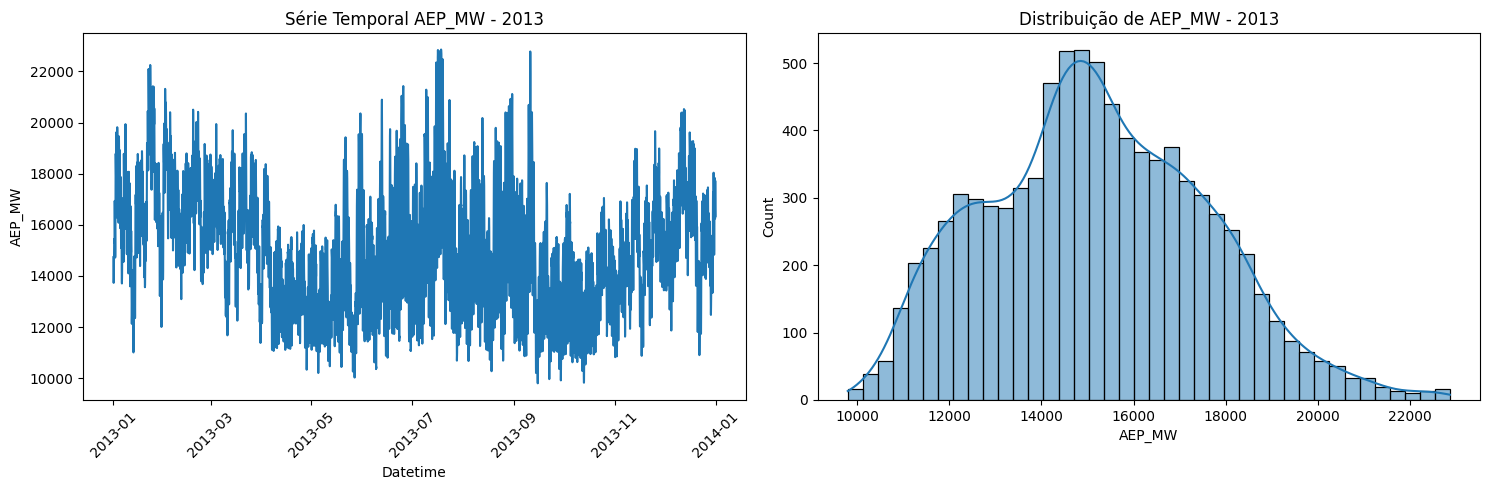

Arquivo EDA gerado e salvo para 2013 em:
 -> ../reports/figures/eda_2013.png
 -> ../data/processed/AEP_2013.csv


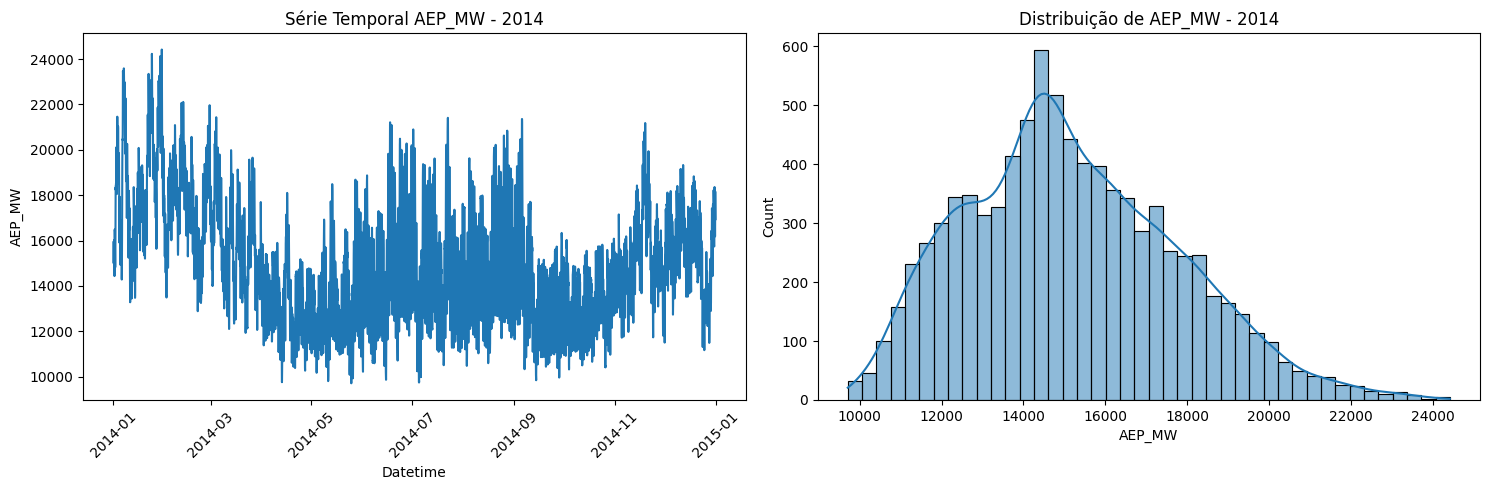

Arquivo EDA gerado e salvo para 2014 em:
 -> ../reports/figures/eda_2014.png
 -> ../data/processed/AEP_2014.csv


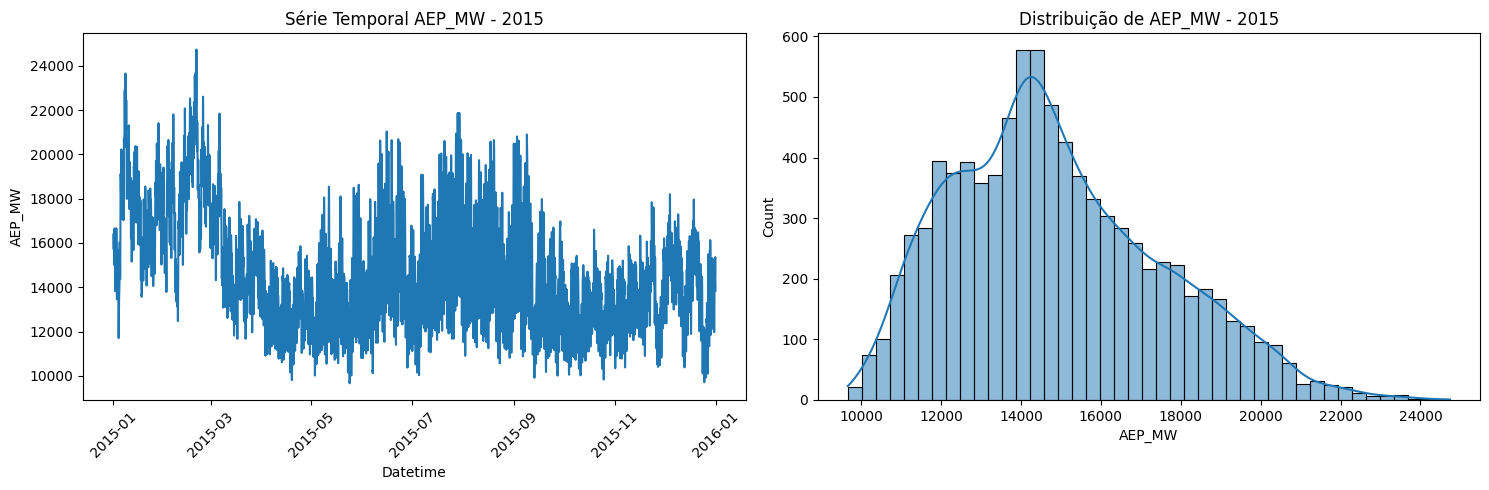

Arquivo EDA gerado e salvo para 2015 em:
 -> ../reports/figures/eda_2015.png
 -> ../data/processed/AEP_2015.csv


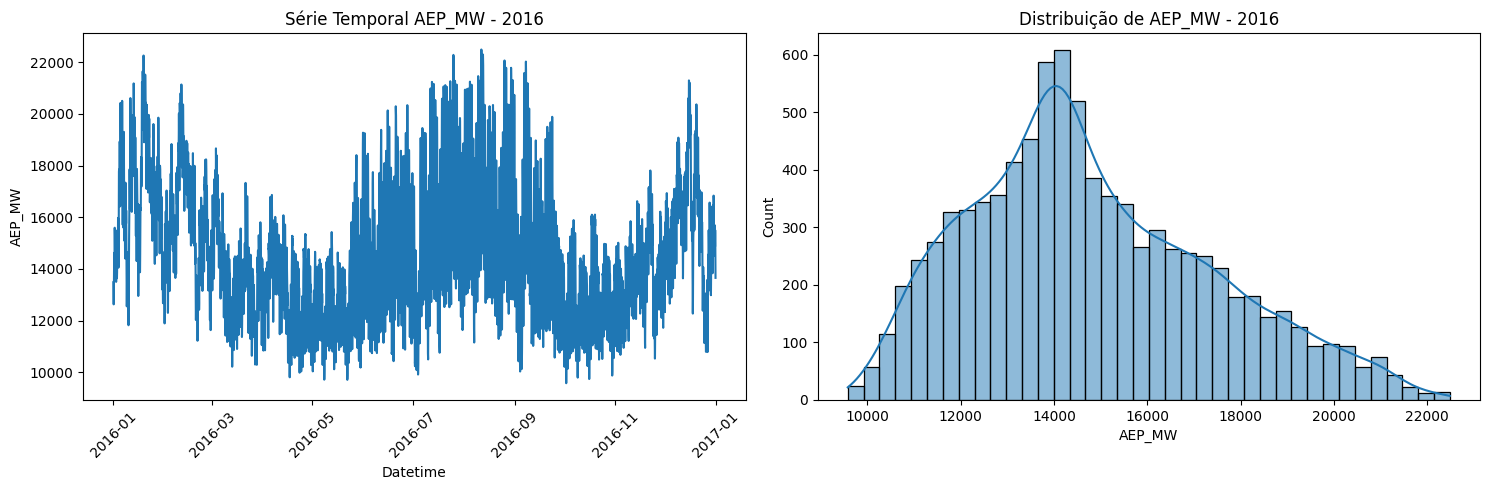

Arquivo EDA gerado e salvo para 2016 em:
 -> ../reports/figures/eda_2016.png
 -> ../data/processed/AEP_2016.csv


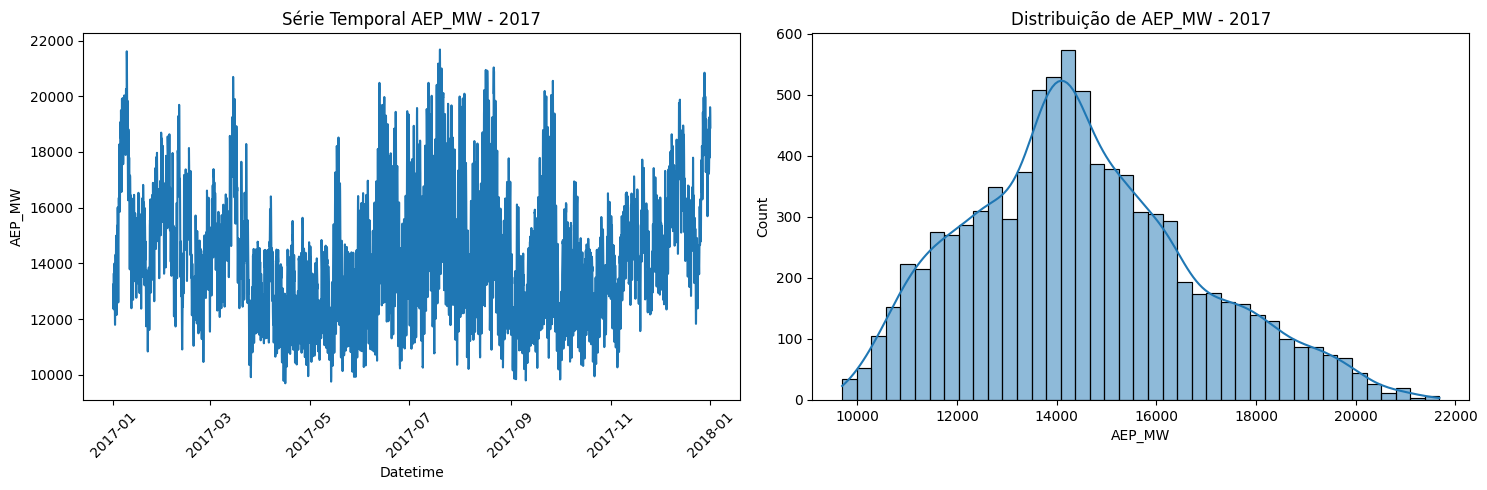

Arquivo EDA gerado e salvo para 2017 em:
 -> ../reports/figures/eda_2017.png
 -> ../data/processed/AEP_2017.csv


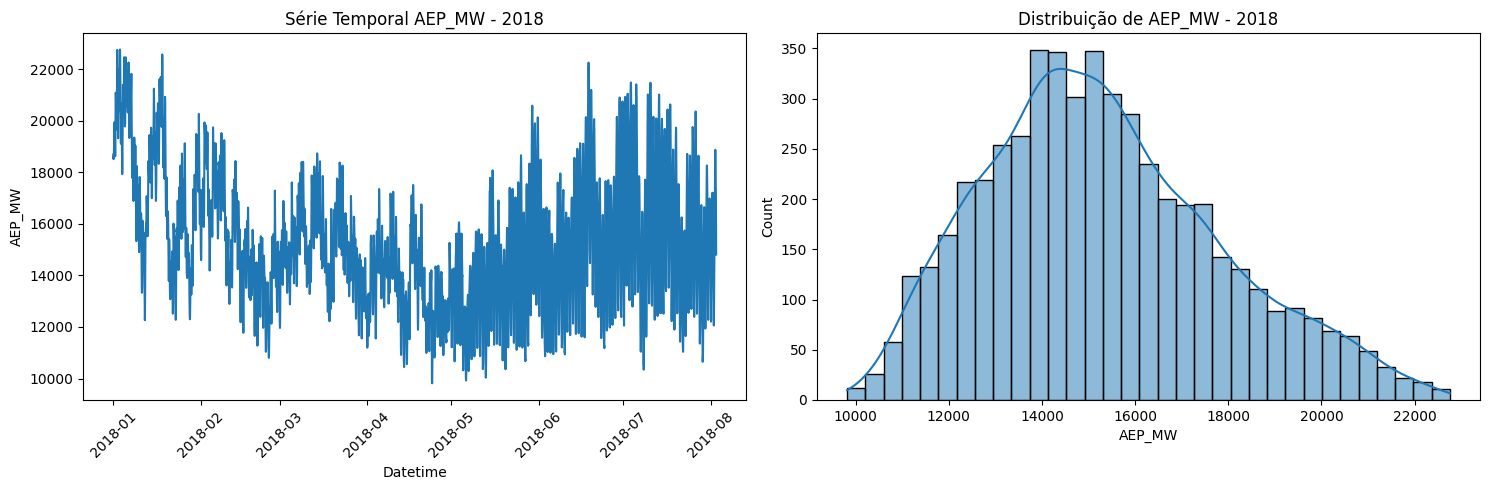

Arquivo EDA gerado e salvo para 2018 em:
 -> ../reports/figures/eda_2018.png
 -> ../data/processed/AEP_2018.csv


In [16]:
# Adiciona a pasta raiz do projeto ao path
from src.utils import plot_eda

# Gernado aqurivos CSV e png do ano de 2004
start_date = '2004-10-01 01:00:00'
end_date = '2004-12-31 23:00:00'
df_age = df_date[(df_date['Datetime'] >= start_date) & (df_date['Datetime'] 
                    <= end_date)].copy()

plot_eda(df_age, 2004)

# Loop gerando arquivos CSV e png dos anos de 2005 a 2009
for i in range(5,18):
    year = 2000 + i
    start_date = f'{year}-01-01 00:00:00'
    end_date = f'{year}-12-31 23:00:00'
    df_age = df_date[(df_date['Datetime'] >= start_date) & (df_date['Datetime'] <= end_date)].copy()

    plot_eda(df_age, year=year)

# Gernado aqurivos CSV e png do ano de 2018
start_date = '2018-01-01 00:00:00'
end_date = '2018-08-03 00:00:00'
df_age = df_date[(df_date['Datetime'] >= start_date) & (df_date['Datetime'] 
                    <= end_date)].copy()

plot_eda(df_age, 2018)

# Gerando os df dos arquviso .csv de 2004 a 2018

In [17]:
df_2004 = load_custom_csv("AEP_2004.csv")
df_2017 = load_custom_csv("AEP_2017.csv")
df_2018 = load_custom_csv("AEP_2018.csv")

In [18]:
#display(df_2004)
print(f'2004 - {df_2004.shape}')
print(f'2017 - {df_2017.shape}')
print(f'2018 - {df_2018.shape}')

2004 - (2206, 2)
2017 - (8760, 2)
2018 - (5136, 2)


In [19]:
# Carregando e testando o arquivo treinado
model = load('../reports/model/randomForest_model.joblib')

In [20]:
df_updated = prepare_feature(df_2017)

In [21]:
X_novos_dados = df_updated[['year', 'month', 'day', 'hour', 'dayofweek', 'is_weekend']]
y_real = df_updated['AEP_MW']

In [22]:
print(X_novos_dados.shape, y_real.shape)

(8760, 6) (8760,)


In [23]:
y_pred = model.predict(X_novos_dados)

In [41]:
metrics = {
    "R2": r2_score(y_real, y_pred),
    "MAE": mean_absolute_error(y_real, y_pred),
    "MSE": mean_squared_error(y_real, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_real, y_pred))
    }

for name, values in metrics.items():
    print(f'{name}: {values}')


R2: 0.9947217461362119
MAE: 103.79501940639268
MSE: 27374.083001224837
RMSE: 165.45114989393346
